## Regression Plots

In [6]:
%matplotlib inline

In [7]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


plt.rc('figure', figsize=(16,8))
plt.rc('font', size=14)  # the rc stands for runtime configuration parameters. These parameters are also known as rc parameters or rc settings. they control the look and feel of Maplotlib plots, such as the figure size, line width, color, and style, axes, axis and grid properties, text and font properties, and so on.




In [8]:
# Load the duncan's prestige dataset

prestige = sm.datasets.get_rdataset('Duncan', 'carData', cache=True).data
prestige.head(), prestige.shape

(            type  income  education  prestige
 rownames                                     
 accountant  prof      62         86        82
 pilot       prof      72         76        83
 architect   prof      75         92        90
 author      prof      55         90        76
 chemist     prof      64         86        90,
 (45, 4))

In [9]:
prestige_model = ols('prestige ~ income + education', data=prestige).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           8.65e-17
Time:                        13:43:36   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

## Influence plots

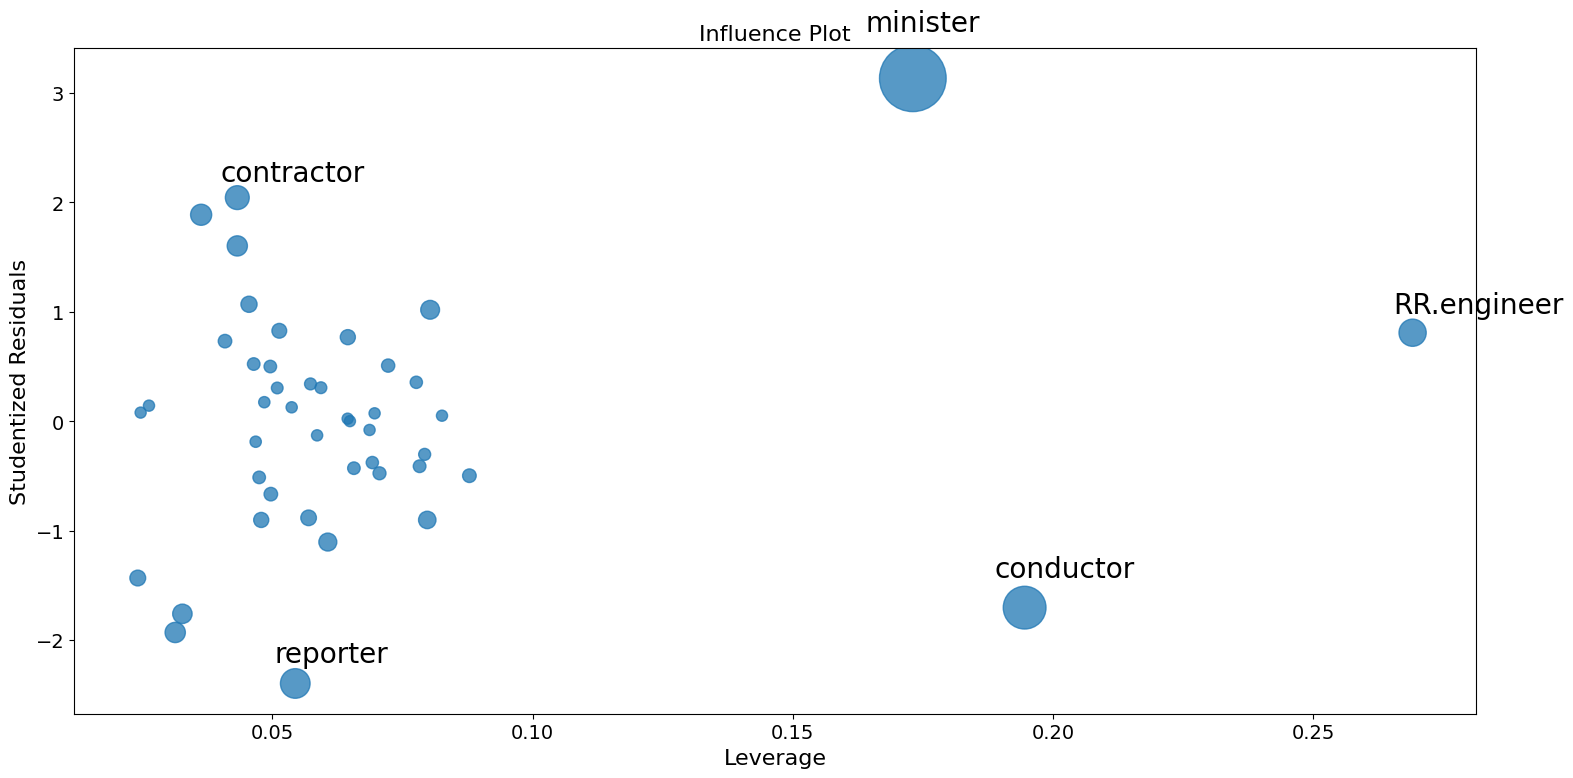

In [11]:
# Influence plots show the externally studentized residuals vs the leverage of each observation as measured by the hat matrix

fig = sm.graphics.influence_plot(prestige_model, criterion='cooks')
fig.tight_layout(pad=1.0)



#observations being both contractor and reporter have low leverage but a large residual. RR engineer has small residual and large leverage. Conductor and minister have both high leverage and large residuals, and therefor large influence.






## Partial Regression Plots (Duncan)

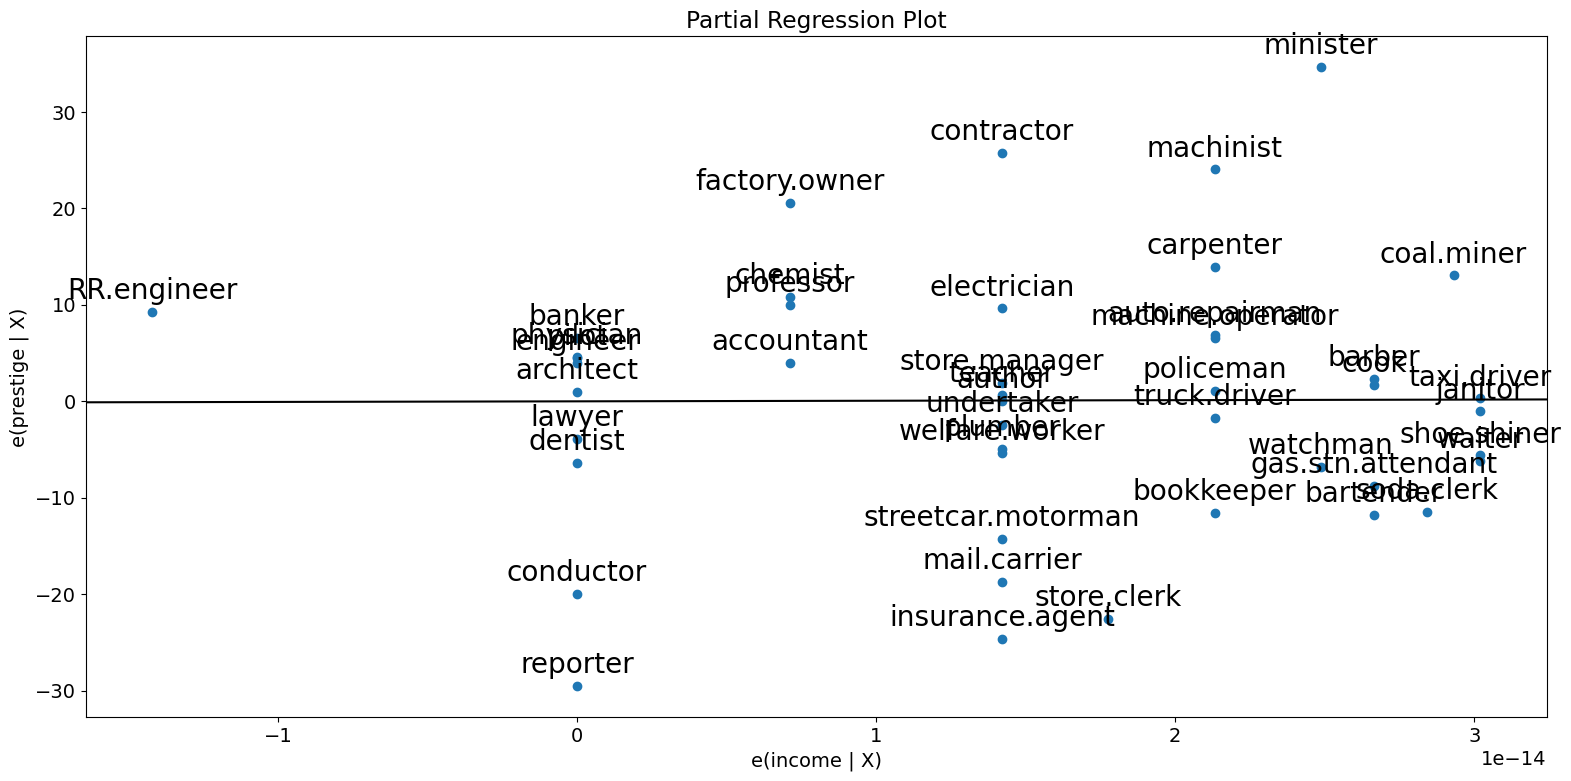

In [13]:
fig = sm.graphics.plot_partregress(
    "prestige", "income", ["income", "education"], data=prestige
)

fig.tight_layout(pad=1.0)

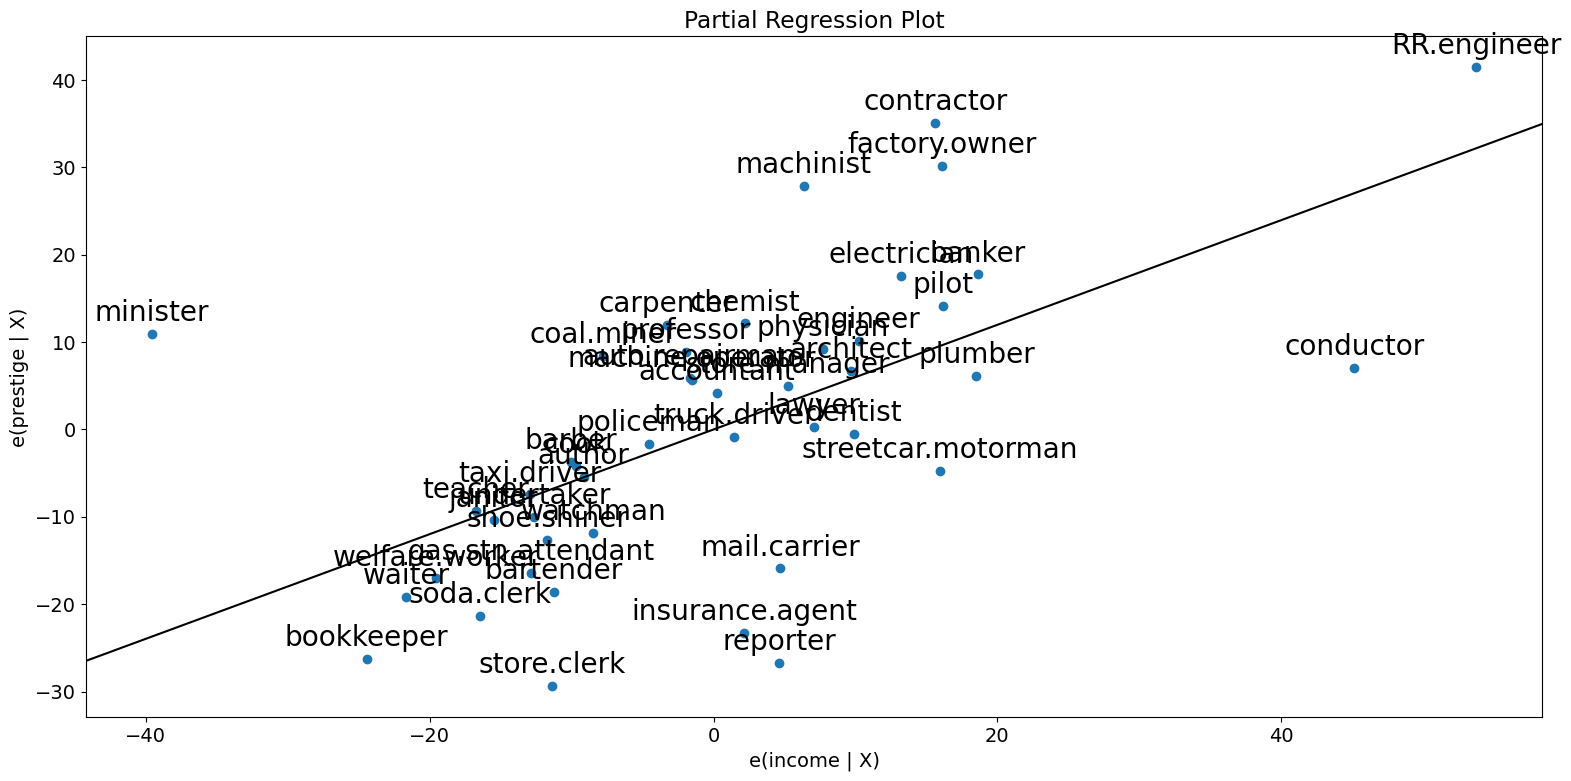

In [14]:
fig = sm.graphics.plot_partregress("prestige", "income", ["education"], data=prestige)
fig.tight_layout(pad=1.0)


In [ ]:
# As you can see the partial regression plot confirms the influence of conductor, minister and RR.engineer on the partial relationship between income and prestige. The cases greatly decreases the effect of income on prestige. Dropping these cases confirms this.

In [18]:
subset = ~prestige.index.isin(['conductor', 'RR.engineer', 'minister'])
prestige_model2 = ols("prestige ~ income + education", data=prestige, subset=subset).fit()
print(prestige_model2.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     138.1
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           2.02e-18
Time:                        14:01:34   Log-Likelihood:                -160.59
No. Observations:                  42   AIC:                             327.2
Df Residuals:                      39   BIC:                             332.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3174      3.680     -1.717      0.0

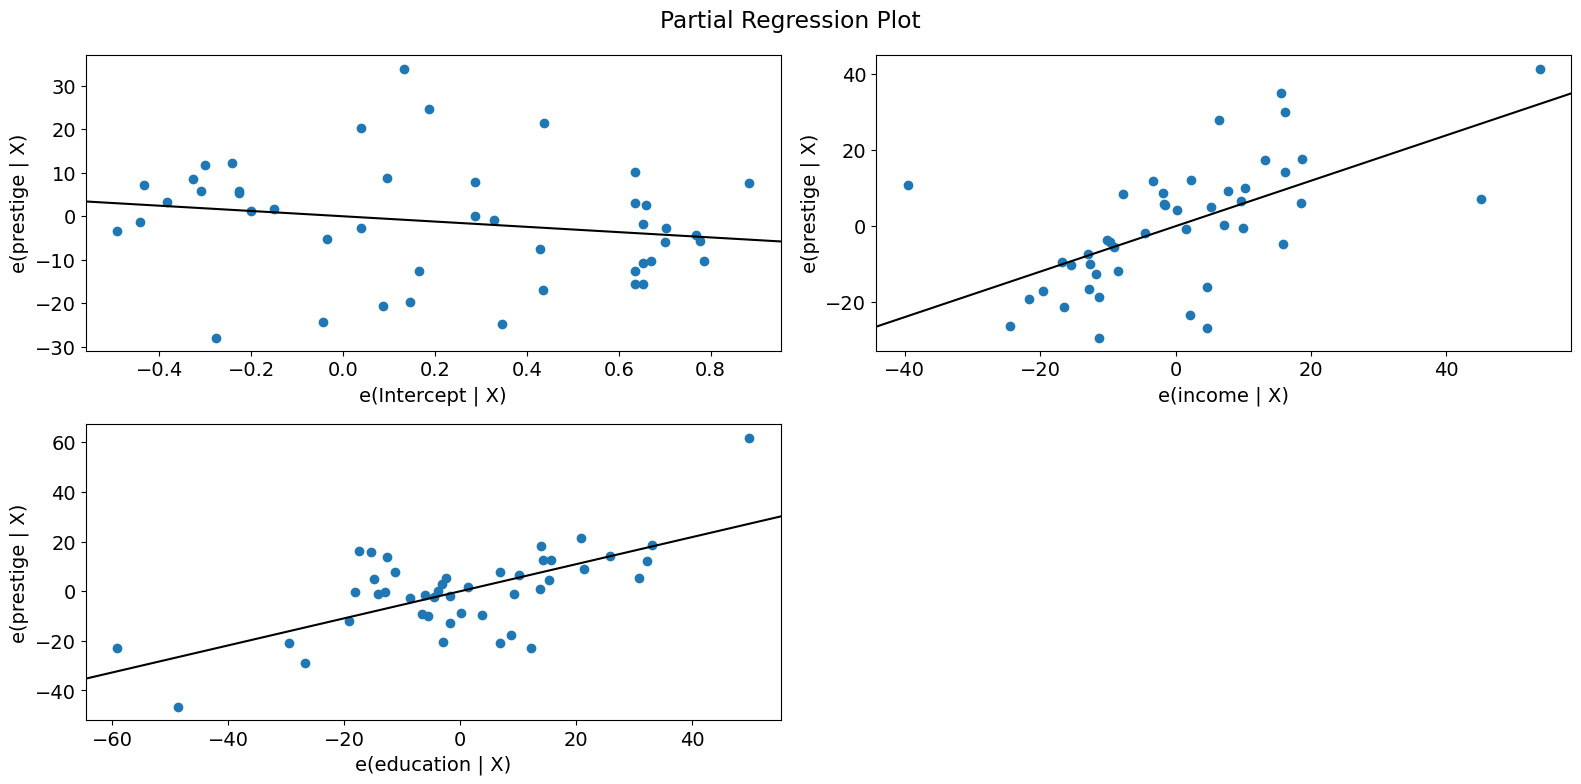

In [21]:
# For a quick check of all the regressors you can use plot_partregress_grid. These plots will not label the points, but you can use them to identify problems and then use plot_partregress to get more information


fig = sm.graphics.plot_partregress_grid(prestige_model)
fig.tight_layout(pad=1.0)

## Component-Component plus Residual (CCPR) plots

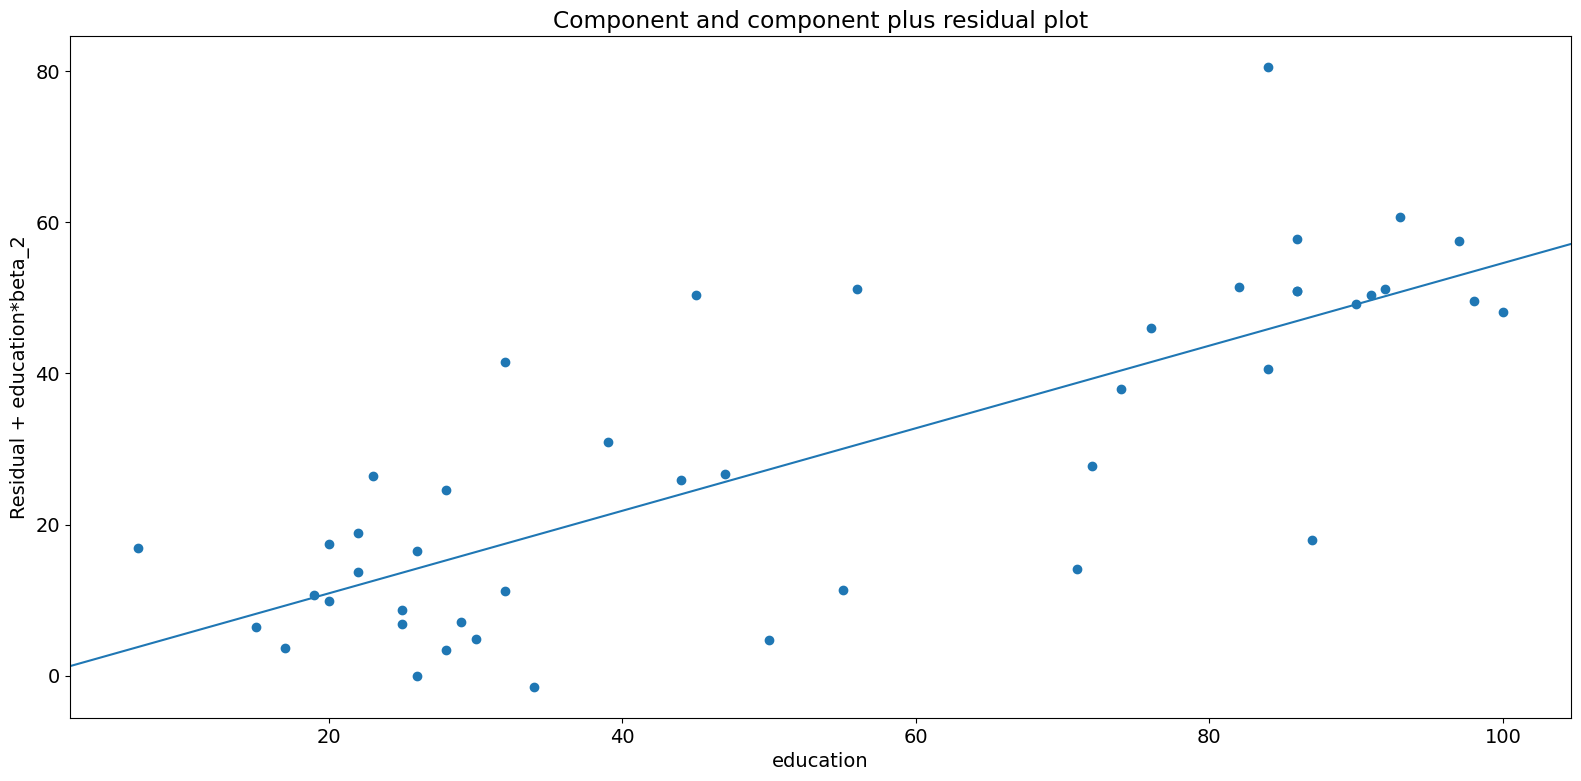

In [22]:
# The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables. The partial residuals plot is defined as Residuals + BX versue X. The component adds BX versus X to show where the fitted line would lie. Care should be take if X is highly correlated with any of the other independent variables. If this is the case, the variance evident in the plot will be an underestimate of the true variance


fig = sm.graphics.plot_ccpr(prestige_model, "education")
fig.tight_layout(pad=1.0)

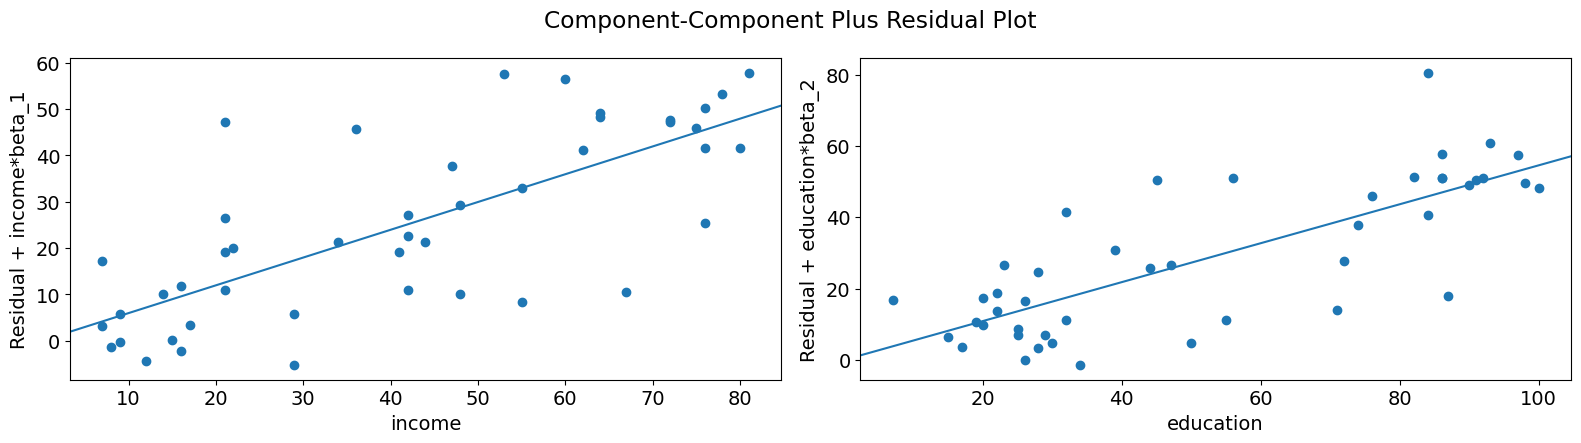

In [28]:
fig = sm.graphics.plot_ccpr_grid(prestige_model)
fig.tight_layout(pad=1.0)

## Single Variable Regression Diagnostics

In [29]:
# The plot_regress_exog function is a convenience funcito that gives a 2x2 plot containing the dependent variable and fitted values with confidence intervals vs the independent variable chosen, the residuals of the model vs the chosen independent variable a partial regression plot and ccpr plot. This funciton can be used for quickly checking modelling assumptions with respect to a single regressor.

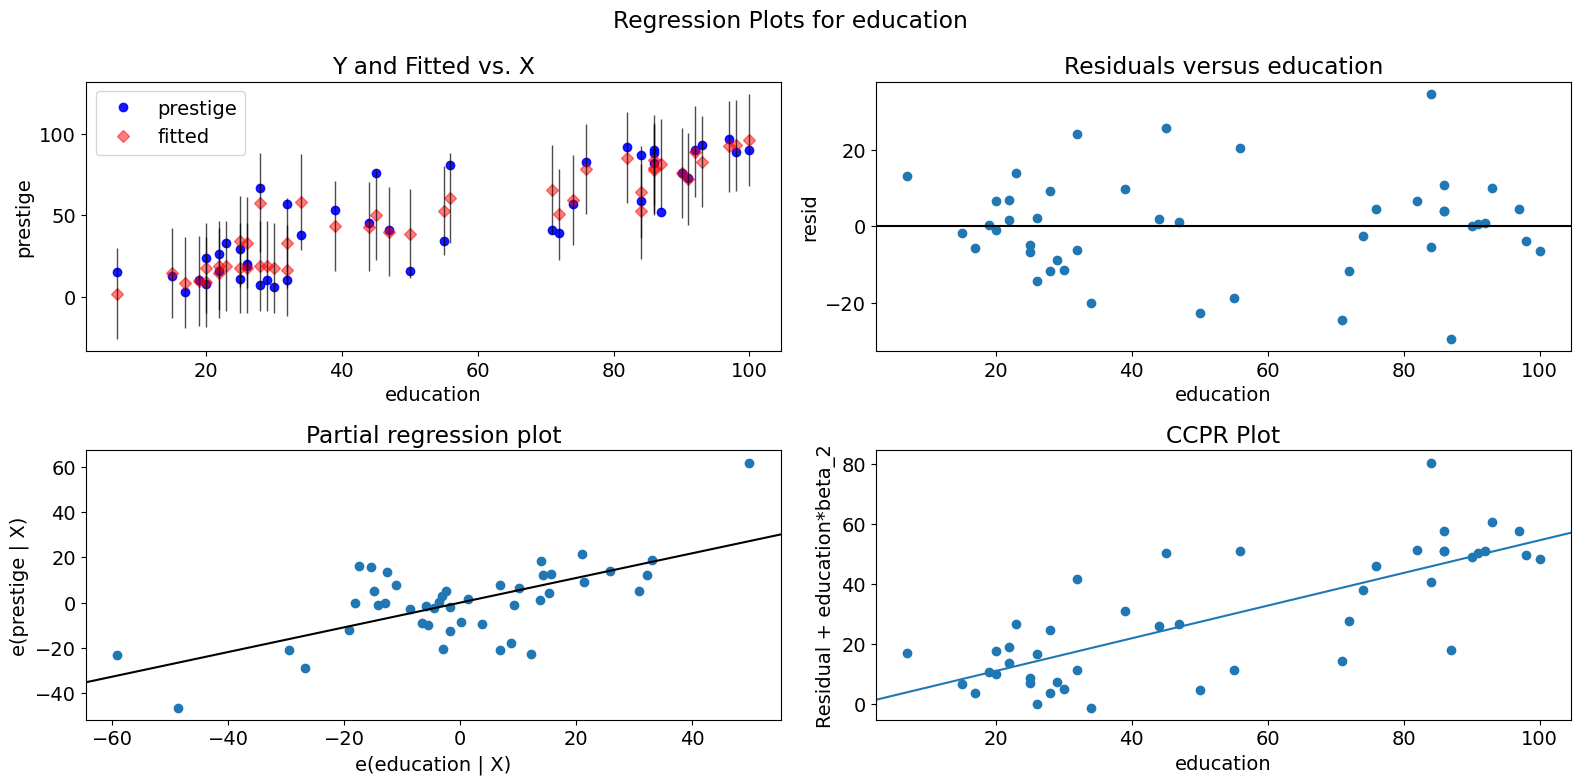

In [30]:
fig = sm.graphics.plot_regress_exog(prestige_model,"education")
fig.tight_layout(pad=1.0)

## Fit Plot

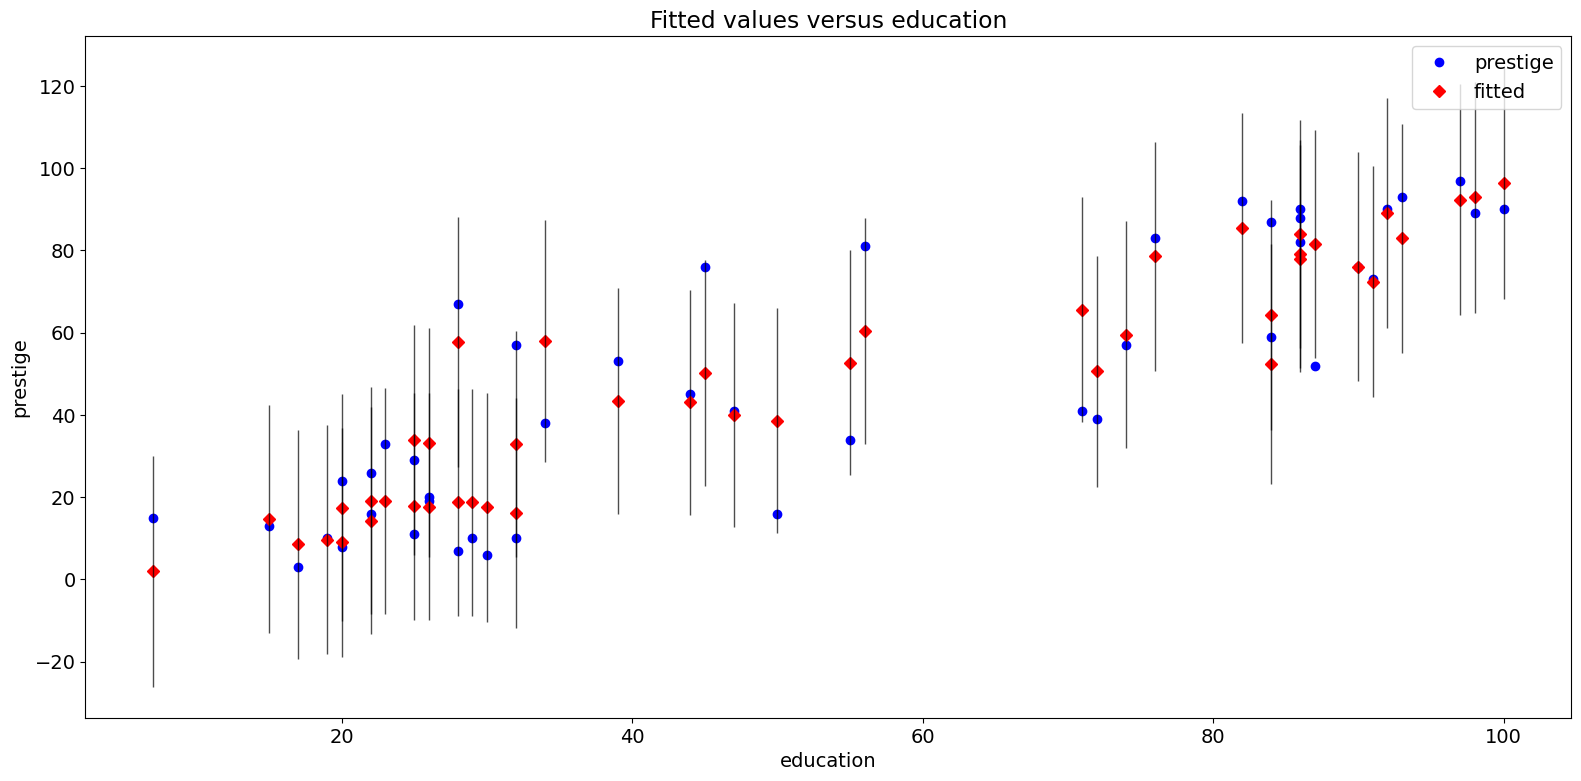

In [31]:
# The plot_fit funciton plots the fitted values versus a chosen independent variable. It includes prediction confidence intervals and optionally plots the true dependent variable


fig  = sm.graphics.plot_fit(prestige_model, "education")
fig.tight_layout(pad=1.0)

In [32]:
dta = sm.datasets.statecrime.load_pandas().data

In [33]:
crime_model = ols("murder ~ urban  + poverty + hs_grad + single", data=dta).fit()
print(crime_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     50.08
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           3.42e-16
Time:                        16:12:05   Log-Likelihood:                -95.050
No. Observations:                  51   AIC:                             200.1
Df Residuals:                      46   BIC:                             209.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -44.1024     12.086     -3.649      0.0

## Partial Regression Plots (Crime Data)

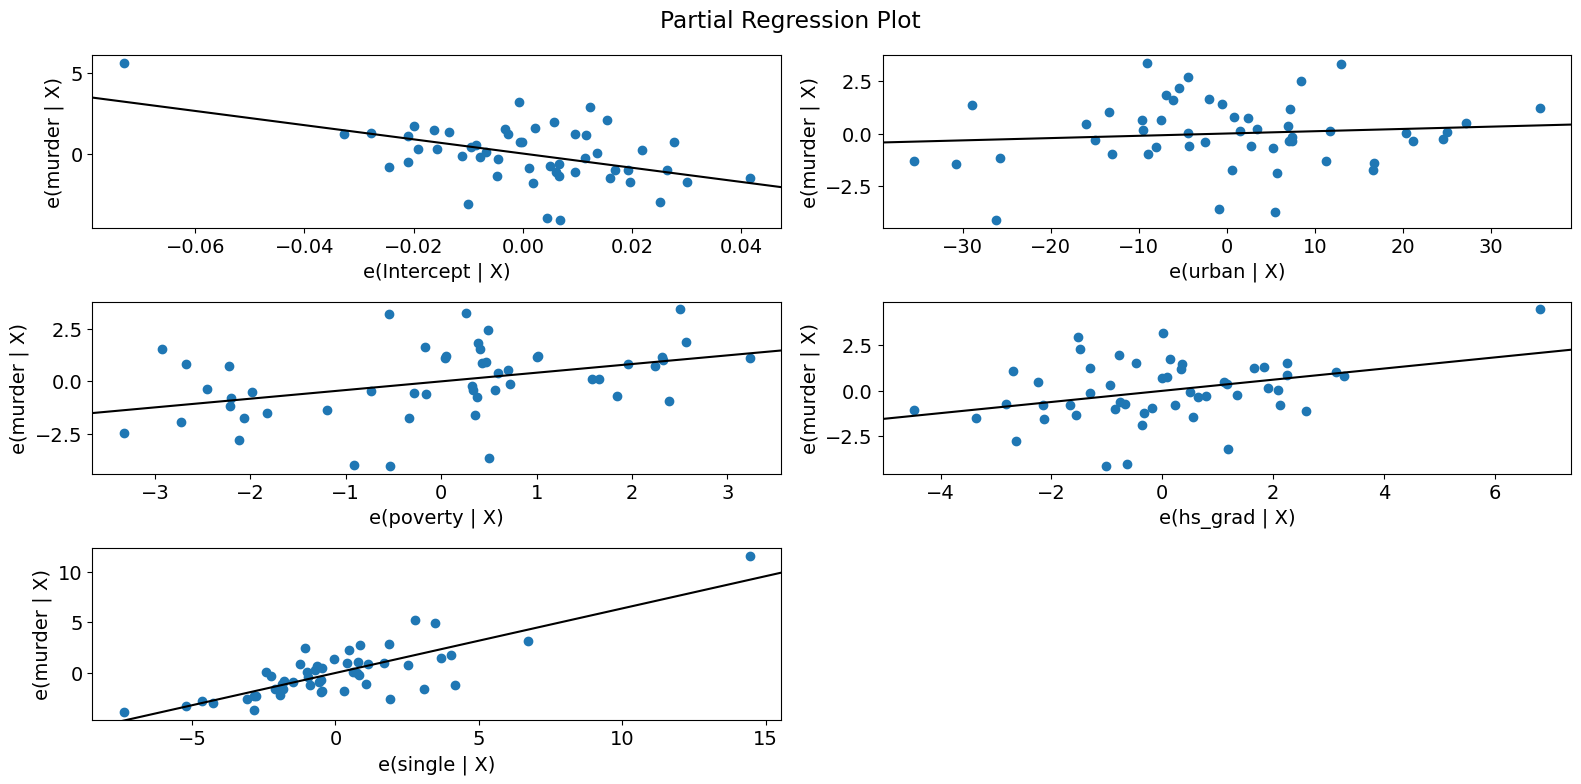

In [34]:
fig = sm.graphics.plot_partregress_grid(crime_model)
fig.tight_layout(pad=1)

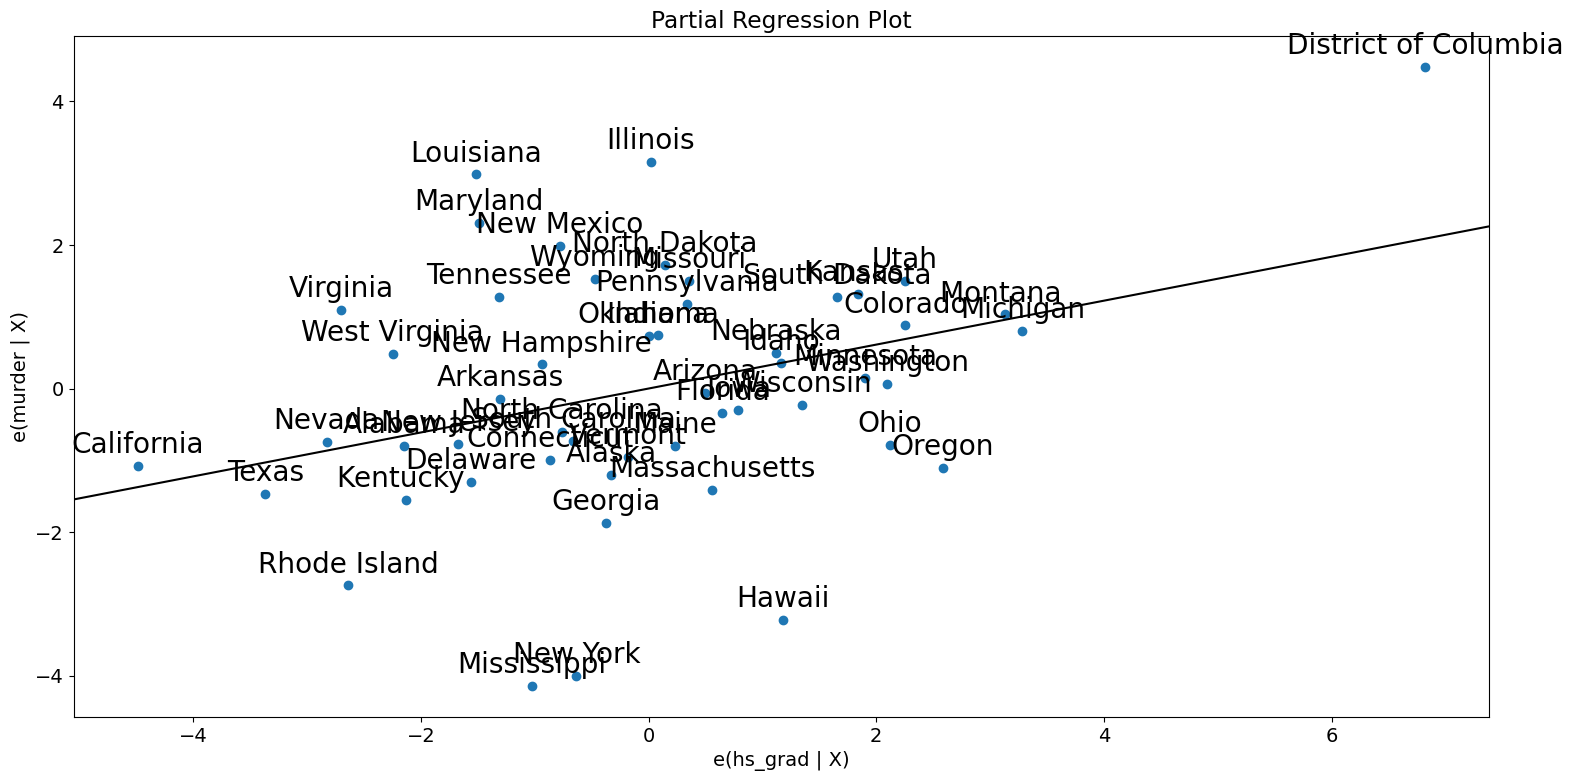

In [37]:
fig = sm.graphics.plot_partregress("murder", "hs_grad", ['urban', 'poverty', 'single'], data=dta)
fig.tight_layout(pad=1.0)

In [36]:
fig.tight_layout(pad=1)

## Leverage-Resid2 Plot

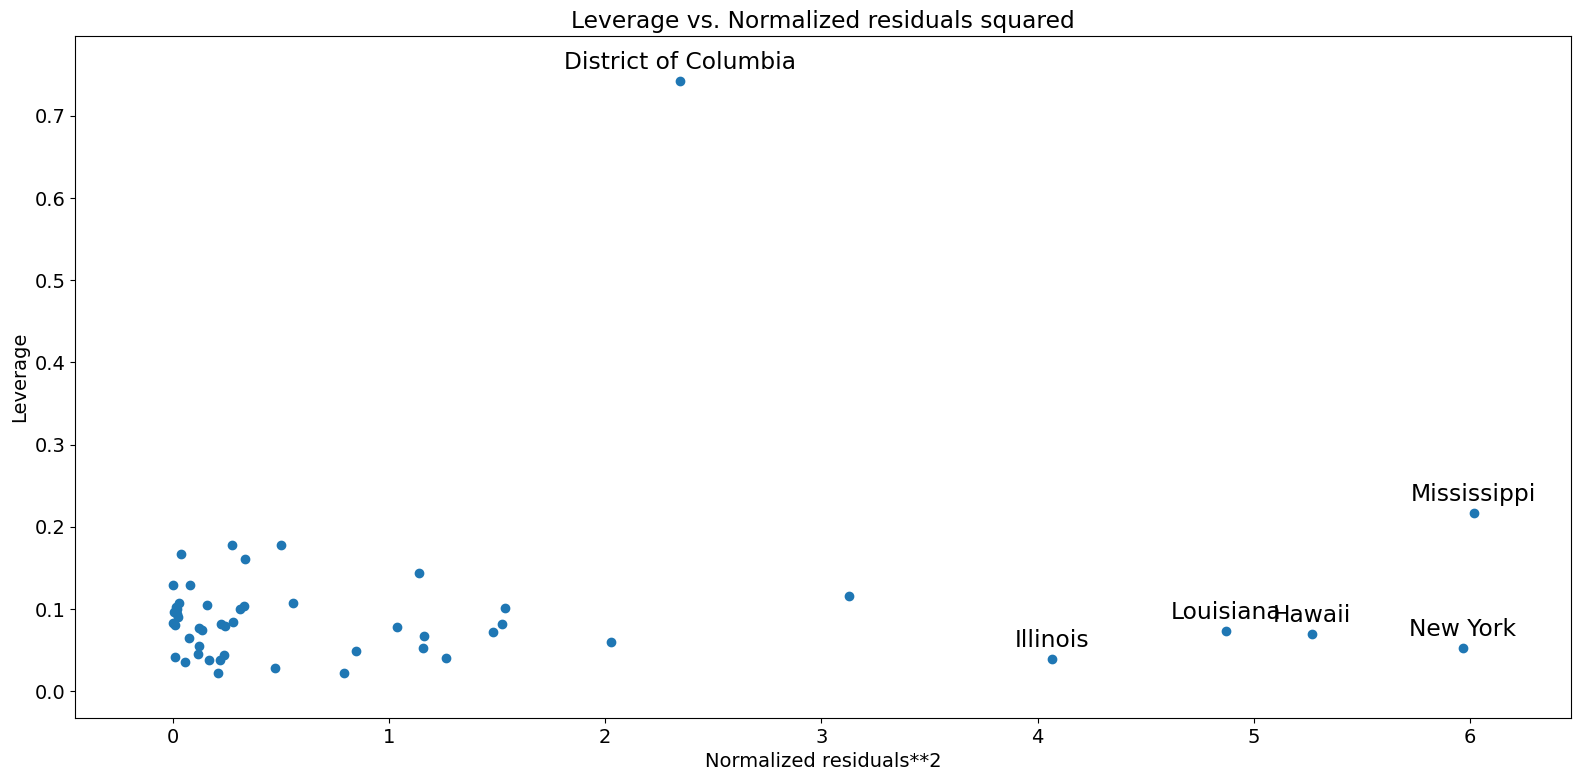

In [38]:
# Closely related to the influence_plot is the leverage-resid2 plot

fig=  sm.graphics.plot_leverage_resid2(crime_model)
fig.tight_layout(pad=1)

## Influence Plot

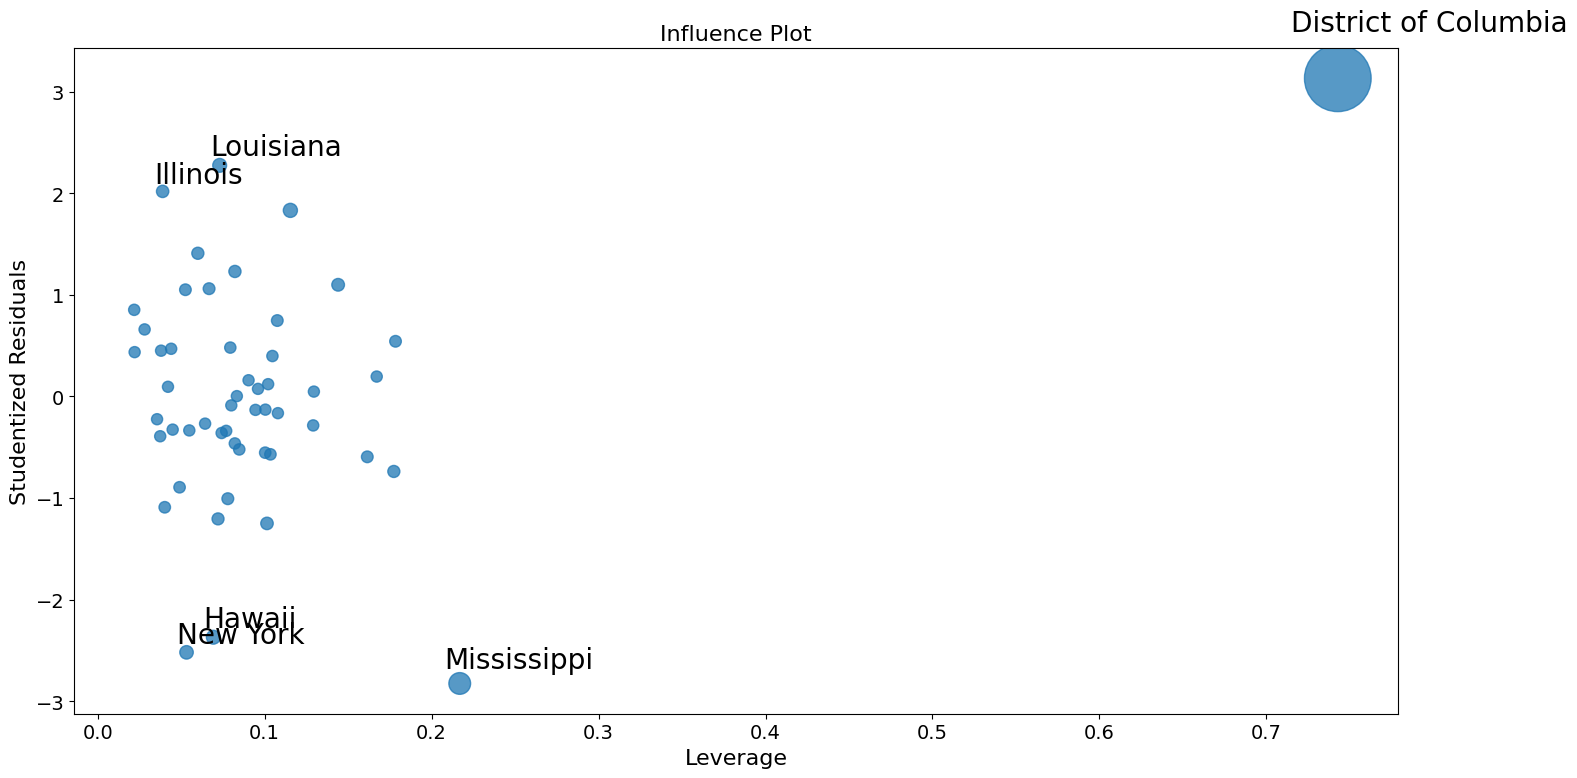

In [39]:
fig = sm.graphics.influence_plot(crime_model)
fig.tight_layout(pad=1)

### Using robust regression to correct for outliers

In [41]:
# part of the problem here is recreateing the stata results is that M-estimators are not robut to leverage points. MM-estimators should do better with this examples.

from statsmodels.formula.api import rlm
rob_crime_model = rlm("murder ~ urban + poverty + hs_grad + single",
                      data=dta,
                      M=sm.robust.norms.TukeyBiweight(3),
).fit(conv="weights")
print(rob_crime_model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 murder   No. Observations:                   51
Model:                            RLM   Df Residuals:                       46
Method:                          IRLS   Df Model:                            4
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 26 Oct 2023                                         
Time:                        16:23:30                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2986      9.494     -0.453      0.6

In [45]:
weights = rob_crime_model.weights
idx = weights>0
X = rob_crime_model.model.exog[idx.values]
ww = weights[idx] / weights[idx].mean()


hat_matrix_diag = ww * (X * np.linalg.pinv(X).T).sum(1)
resid = rob_crime_model.resid
resid2 = resid ** 2
resid2 /= resid2.sum()
nobs=  int(idx.sum())
hm = hat_matrix_diag.mean()
rm = resid2.mean()

In [ ]:
from statsmodels.graphics import utils

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(resid2[idx], hat_matrix_diag, "o")
ax = utils.annotate_axes(
    range(nobs),
    labels = rob_crime_model.data.row_labels[idx],
    points = lzip(resid2[idx], hat_matrix_diag),
    offset_points=[(-5,5)] * nobs,
    size='large',
    ax=ax

)

ax.set_xlabel("resid2")
ax.set_ylabel("leverage")
ylim = ax.get_ylim()
ax.vlines(rm, *ylim)
xlim = ax.get_xlim()
ax.hlines(hm, *xlim)
ax.margins(0, 0)